In [50]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = False)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [51]:
X_treinamento = mnist.train.images
y_treinamento = mnist.train.labels
X_teste = mnist.test.images
y_teste = mnist.test.labels

In [52]:
y_treinamento = np.asarray(y_treinamento, dtype = np.int32)
y_teste = np.asarray(y_teste, dtype = np.int32)

In [53]:
X_treinamento.shape

(55000, 784)

In [54]:
X_teste.shape

(10000, 784)

In [55]:
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [56]:
y_treinamento

array([7, 3, 4, ..., 5, 6, 8], dtype=int32)

Text(0.5,1,'Classe: 4')

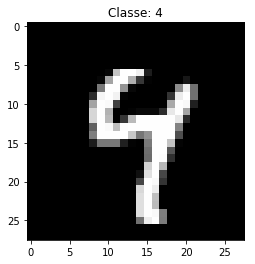

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_treinamento[2].reshape((28,28)), cmap = 'gray')
plt.title('Classe: ' + str(y_treinamento[2]))

In [58]:
import tensorflow as tf

In [59]:
def cria_rede(features, labels, mode):
    # batch_size, largura, altura, canais
    entrada = tf.reshape(features['X'], [-1, 28, 28, 1])
    
    # recebe [batch_size, 28, 28, 1]
    # retorna [batch_size, 28, 28, 32]
    convolucao1 = tf.layers.conv2d(inputs = entrada, filters = 32, kernel_size=[5,5], activation = tf.nn.relu,
                                  padding = 'same')
    # recebe [batch_size, 28, 28, 32]
    # retorna [batch_size, 14, 14, 32]
    pooling1 = tf.layers.max_pooling2d(inputs = convolucao1, pool_size = [2,2], strides = 2)
    
    # recebe [batch_size, 14, 14, 32]
    # retorna [batch_size, 14, 14, 64]
    convolucao2 = tf.layers.conv2d(inputs = pooling1, filters = 64, kernel_size = [5,5], activation = tf.nn.relu,
                                  padding = 'same')
    # recebe [batch_size, 14, 14, 64]
    # retorna [batch_size, 7, 7, 64]
    pooling2 = tf.layers.max_pooling2d(inputs = convolucao2, pool_size = [2,2], strides = 2)
    
    # recebe [batch_size, 7, 7, 64]
    # retornar [batch_size, 3136]
    flattening = tf.reshape(pooling2, [-1, 7 * 7 * 64])
    
    # 3136 (entradas) -> 1024 (oculta) -> 10 (saída)
    # recebe [batch_size, 3136]
    # retornar [batch_size, 1024]
    densa = tf.layers.dense(inputs = flattening, units = 1024, activation = tf.nn.relu)
    
    # dropout
    dropout = tf.layers.dropout(inputs = densa, rate = 0.2, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # recebe [batch_size, 1024]
    # retornar [batch_size, 10]
    saida = tf.layers.dense(inputs = dropout, units = 10)
    
    # 0.2 0.2 0.6 - 2
    previsoes = tf.argmax(saida, axis = 1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = previsoes)
    
    erro = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = saida)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
        treinamento = otimizador.minimize(erro, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, train_op = treinamento)
    
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = previsoes)}
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, eval_metric_ops = eval_metrics_ops)
    

In [60]:
classificador = tf.estimator.Estimator(model_fn = cria_rede)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmphwe86clx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c38c7c978>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [61]:
funcao_treinamento = tf.estimator.inputs.numpy_input_fn(x = {'X': X_treinamento}, y = y_treinamento,
                                                       batch_size = 128, num_epochs = None, shuffle = True)
classificador.train(input_fn=funcao_treinamento, steps = 200)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmphwe86clx/model.ckpt.
INFO:tensorflow:loss = 2.308632, step = 1
INFO:tensorflow:global_step/sec: 6.65996
INFO:tensorflow:loss = 0.071991384, step = 101 (15.016 sec)
INFO:tensorflow:Saving checkpoints for 200 into /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmphwe86clx/model.ckpt.
INFO:tensorflow:Loss for final step: 0.10527852.


In [62]:
funcao_teste = tf.estimator.inputs.numpy_input_fn(x = {'X': X_teste}, y = y_teste, num_epochs = 1,
                                                      shuffle = False)
resultados = classificador.evaluate(input_fn=funcao_teste)
resultados

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-14-20:58:15
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmphwe86clx/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-11-14-20:58:19
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.9789, global_step = 200, loss = 0.067205064
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmphwe86clx/model.ckpt-200


{'accuracy': 0.9789, 'loss': 0.067205064, 'global_step': 200}

In [70]:
X_imagem_teste = X_teste[1]
X_imagem_teste.shape

(784,)

In [71]:
X_imagem_teste = X_imagem_teste.reshape(1,-1)
X_imagem_teste.shape

(1, 784)

In [72]:
funcao_previsao = tf.estimator.inputs.numpy_input_fn(x = {'X': X_imagem_teste}, shuffle = False)
pred = list(classificador.predict(input_fn = funcao_previsao))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/7f/wlmrltf57q95bdd5fl85dpw40000gn/T/tmphwe86clx/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [73]:
pred[0]

2

Text(0.5,1,'Classe prevista: 2')

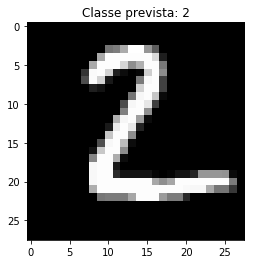

In [74]:
plt.imshow(X_imagem_teste.reshape((28, 28)), cmap = 'gray')
plt.title('Classe prevista: ' + str(pred[0]))